In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False

## Logistic Regression on Linearly Separable data

### Fetch data from a text file

In [2]:
df = pd.read_csv('data/linearly_separable.txt',sep = ',',header = None, names =['x1','x2','y'])

In [3]:
df.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.groupby('y').count()

,x1,x2
y,,
0,40,40
1,60,60


In [6]:
X = np.array(df[['x1','x2']], dtype = np.float64)

In [291]:
y = np.array(df[['y']])

### Visualize the data

<AxesSubplot:xlabel='x1', ylabel='x2'>

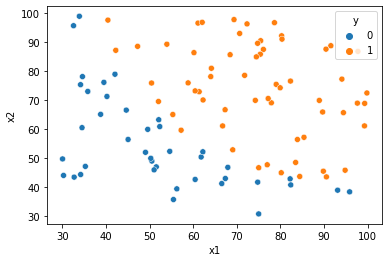

In [8]:
sns.scatterplot(data =df, x = 'x1', y = 'x2', hue = 'y')

### Scale Features

In [9]:
def min_max_scaler(X):
    """Scales the given X feature vector in the range of [0,1].
        For each feature x_j, 
            x_j_new = (x_j - x_j_min)/(x_j_max - x_j_min)"""
    X_min = np.min(X,axis = 0)
    X_max = np.max(X,axis = 0)
    return (X-X_min)/(X_max - X_min)

In [10]:
X = min_max_scaler(X)

### Flatten the label vector 

In [209]:
y = y.flatten()

In [11]:
X.shape

(100, 2)

In [12]:
y.shape

(100, 1)

In [17]:
r = np.random.rand(2,1)
r.shape

(2, 1)

In [28]:
np.maximum(0, [-1, 2, 3, -2])

array([0, 2, 3, 0])

In [24]:
y = np.dot(X[:10],r)>0.5

array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [175]:
r = np.array([0,-1, 0.5, 0.6, 0, -2])

In [176]:
q = [0 if el<=0 else 1 for el in r]
q

[0, 0, 1, 1, 0, 0]

In [177]:
r*q

array([ 0. , -0. ,  0.5,  0.6,  0. , -0. ])

In [91]:
r[r<0]=0

In [92]:
s = 

array([0. , 0. , 0.5, 0.6, 0. , 0. ])

In [293]:
y.shape

(100, 1)

In [292]:
((-1)**y).shape

(100, 1)

In [186]:
np.power((-1),y)

In [410]:
class SVM():
    def __init__(self, theta = None, C =1.0):
        self.theta = theta
        self.C = C
    
    def lengthen(self,X):
        return np.c_[np.ones((len(X),1)),X]
    
    def predict(self,X_test):
        X_test = self.lengthen(X_test)
        return np.sign(np.dot(X,self.theta))
    
    def h(self,X,M=1):
        return np.sign(np.dot(X,self.theta))
    
    def compute_cost(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        J = 0.5*np.linalg.norm(self.theta)**2 +   self.C*(1/m)* np.sum( np.maximum(0, 1+ ((-1)**y)*self.h(X) ) )
        return J
    
    def compute_gradient(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        grad_J = self.theta + (1/m)* np.array([ np.sum( np.multiply(np.array([[0 if el==0 else 1 for el in np.maximum(0, 1+ ((-1)**y)*self.h(X))]] ).T ,X),axis =0)]).T
        return grad_J
    
    def fit(self, X, y, alpha =0.001, num_iters = 1000, tol = 1e-2):
        J_history = []
        self.theta = np.zeros((X.shape[1]+1,1))
        for iteration in range(num_iters):
            J_history.append(self.compute_cost(X,y))
            if abs(J_history[-1])<tol:
                break
            grad_J = self.compute_gradient(X,y)
            self.theta = self.theta - alpha*grad_J
        
        return J_history

In [411]:
svm = SVM()#theta = np.random.randn(3,1))

<AxesSubplot:title={'center':'Learning curve of Logistic Regression classifier'}, xlabel='iteration', ylabel='Training Cost, J'>

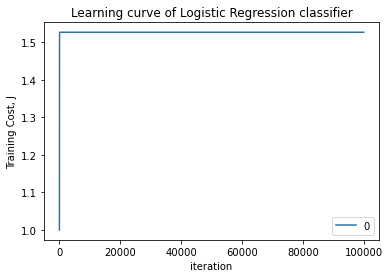

In [415]:
J_history = svm.fit(X,y, alpha = 0.1, num_iters = int(1e5), tol = 1e-2)

pd.DataFrame(J_history).plot(xlabel= 'iteration', ylabel = 'Training Cost, J', title = 'Learning curve of Logistic Regression classifier')

In [ ]:
svm.compute_cost(X,y)

In [275]:
svm.compute_gradient(X,y)

array([0.16415341, 0.71859257, 1.16336209])

### Fit Logistic Regression model

In [11]:
class LogisticRegression():
    def __init__(self,theta =None):
        self.theta = theta
    
    def lengthen(self,X):
        return np.c_[np.ones((len(X),1)), X]
    
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
        
    def predict(self, X_test):
        X_test = self.lengthen(X_test)
        return self.sigmoid(np.matmul(X_test,self.theta))
    
    def h(self,X):
        return self.sigmoid(np.dot(X,self.theta))
    
    def compute_cost(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        J = (-1/m)* sum( (y*np.log(self.h(X))) + ( (1-y)* np.log(1- self.h(X))) )
        return J
    
    def compute_gradient(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        grad_J = (1/m)* np.dot(X.T,(self.h(X)-y))
        return grad_J
    
    def fit(self, X, y, alpha =0.001, num_iters = 1000, tol = 1e-2):
        J_history = []
        self.theta = np.zeros((X.shape[1]+1,1))
        for iteration in range(num_iters):
            J_history.append(self.compute_cost(X,y))
            if abs(J_history[-1])<tol:
                break
            grad_J = self.compute_gradient(X,y)
            self.theta = self.theta - alpha*grad_J
        
        return J_history

In [12]:
clf = LogisticRegression()

In [13]:
J_history = clf.fit(X,y, alpha = 0.1, num_iters = int(1e5), tol = 1e-2)

<AxesSubplot:title={'center':'Learning curve of Logistic Regression classifier'}, xlabel='iteration', ylabel='Training Cost, J'>

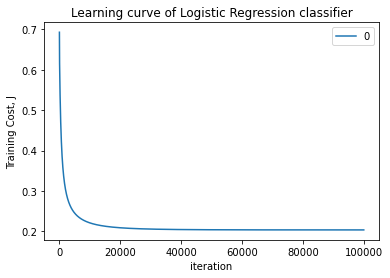

In [14]:
pd.DataFrame(J_history).plot(xlabel= 'iteration', ylabel = 'Training Cost, J', title = 'Learning curve of Logistic Regression classifier')

In [15]:
clf.theta

array([[-12.65406006],
       [ 14.23256197],
       [ 13.599403  ]])

### Visualize the decision boundary obtained

Decision boundary is given by:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$

Given a value of $x_1$, we can find the value of $x_2$ as follows:

$x_2 = - \frac{(\theta_0 + \theta_1 x_1)} {\theta_2}$
    

In [16]:
x1 = X[:,0]
x2= - (clf.theta[0] + clf.theta[1]*x1)/clf.theta[2]

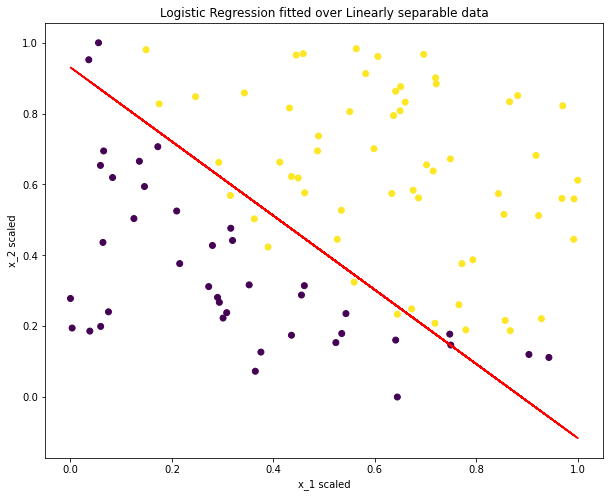

In [17]:
plt.figure(1, figsize= (10,8))
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(x1,x2, 'r', label = 'Decision boundary')
plt.xlabel('x_1 scaled')
plt.ylabel('x_2 scaled')
plt.title('Logistic Regression fitted over Linearly separable data')
plt.show()